In [1]:
import sys 
import os 
import numpy as np
import torch
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
sys.path.append('../')
import glob
import tqdm

In [2]:
from src.utils.normalizer import Normalizer

In [40]:
#our spherical measure is the the conditioning of the eigenvalues of the covariance matrix

def spherical_measure(samples):
    samples = samples - samples.mean(dim=0)
    #samples of shape (n, d)
    n, d = samples.shape
    corr = torch.corrcoef(samples.T)
    # print(corr.shape)
    # raise ValueError
    #get the eigenvalues
    eigvals, _ = torch.linalg.eig(corr)
    
    eigvals = torch.abs(eigvals)
    # print(eigvals)
    # raise ValueError
    #condition number
    cond = torch.max(eigvals) / torch.min(eigvals)
    return cond.item()

def subvectorize_and_condition(W, d):
    
    if W.shape[1] % d != 0:
        #pad with zeros
        pad = d - (W.shape[1] % d)
        W = torch.cat([W, torch.zeros(W.shape[0], pad, device=W.device)], dim=1)
    

    #subvectorize
    W_sub = W.view(-1, d)
    return spherical_measure(W_sub)

In [ ]:
# linear_layer = "layer_1/mlp.up_proj"

layers = glob.glob(f"/data/lliu/huffman/models/meta-llama/Llama-2-*/original_weights/*/*.pt")

device = torch.device("cuda:6")
Cs_orig = []
Cs_norm = []
d=6
with torch.no_grad():
    for linear_layer in tqdm.tqdm(layers):
        try:
            weight = torch.load(linear_layer, map_location=device)["weight"]
            
            C_orig = subvectorize_and_condition(weight,d)
            # raise ValueError
            _,weight_normalized = Normalizer.normalize_init(weight, [0,1], [False,False],norm_rescale=True, powers=2,
                                                        p=2)
            
            C_norm = subvectorize_and_condition(weight_normalized,d)
            
            Cs_orig.append(C_orig)
            Cs_norm.append(C_norm)
        except Exception as e:
            print(e)
            continue

 74%|███████▍  | 789/1064 [01:51<00:38,  7.08it/s]


RuntimeError: torch.linalg.eig: input tensor should not contain infs or NaNs.

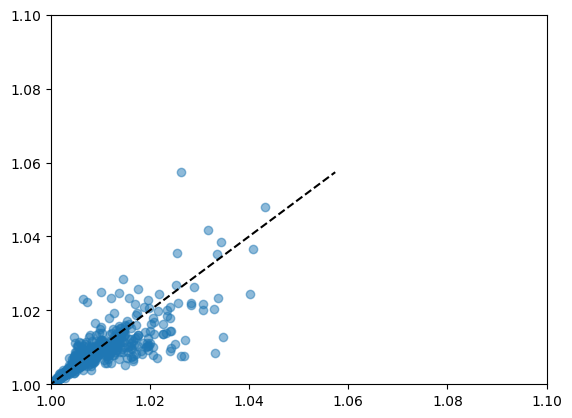

In [42]:
import matplotlib.pyplot as plt

plt.plot(Cs_norm,Cs_orig, 'o',alpha = 0.5)
#set equal aspect ratio

plot_range = [1, 1.1]
plt.ylim(plot_range)
plt.xlim(plot_range)

#draw a 1:1 line
plt.plot([0,max(Cs_orig)], [0,max(Cs_orig)], 'k--')

In [21]:
Cs_orig

[21.65917205810547,
 34.98318099975586,
 330.45819091796875,
 96.13386535644531,
 34.54720687866211,
 125.41545867919922,
 11.744349479675293,
 146.7382049560547,
 36.88841247558594,
 66.92771911621094,
 42.30125427246094,
 223.82974243164062,
 68.85382080078125,
 404.880859375,
 273.0745544433594,
 83.74523162841797,
 443.5111999511719,
 24.02142333984375,
 41.62482452392578,
 61.11040496826172,
 1026.084716796875,
 44.128170013427734,
 80.7614517211914,
 240.41563415527344,
 11.175971984863281,
 206.8996124267578,
 25.788101196289062,
 286.2560119628906,
 15.053216934204102,
 285.3208923339844,
 28.68284797668457,
 45.2976188659668,
 200.17530822753906,
 29.729496002197266,
 124.35733795166016,
 11.430561065673828,
 83.33008575439453,
 20.1378116607666,
 30.47677993774414,
 20.704666137695312,
 298.2412109375,
 19.044483184814453,
 10.679890632629395,
 119.38057708740234,
 78.32709503173828,
 1226.63427734375,
 34.7823486328125,
 173.1982879638672,
 51.439125061035156,
 13.6035594940